In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn  
import torch.optim as optim  
import torchvision.transforms as transforms 
import torchvision
import os
from skimage import io
from torch.utils.data import (Dataset,DataLoader) 

In [ ]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_directory = '/content/drive/MyDrive/Colab Notebooks/SoftComputing Lab/Assignment2/training-c.csv'
df = pd.read_csv(main_directory, sep=",")
print(df)

         filename           original filename  ...  contributing team  database name
0      c00000.png  Scan_280_digit_6_num_7.png  ...   Buet_Backpropers     training-c
1      c00001.png   Scan_29_digit_1_num_1.png  ...   Buet_Backpropers     training-c
2      c00002.png  Scan_131_digit_3_num_1.png  ...   Buet_Backpropers     training-c
3      c00003.png  Scan_160_digit_2_num_2.png  ...   Buet_Backpropers     training-c
4      c00004.png  Scan_202_digit_7_num_0.png  ...   Buet_Backpropers     training-c
...           ...                         ...  ...                ...            ...
24293  c24293.png  Scan_167_digit_3_num_4.png  ...   Buet_Backpropers     training-c
24294  c24294.png  Scan_174_digit_2_num_8.png  ...   Buet_Backpropers     training-c
24295  c24295.png  Scan_152_digit_7_num_4.png  ...   Buet_Backpropers     training-c
24296  c24296.png  Scan_123_digit_2_num_2.png  ...   Buet_Backpropers     training-c
24297  c24297.png    Scan_2_digit_7_num_6.png  ...   Buet_Backpro

In [ ]:
df.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [ ]:
df = df.drop(['original filename','scanid','database name original', 'contributing team','database name'], axis = 1)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/SoftComputing Lab/Assignment2/modified.csv',index = False)

In [ ]:
batch_size = 50
input_dim = 100*100 
num_hidden = 350
output_dim = 10
learning_rate = 0.1 


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class HandWrittenNumberRecognition(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [ ]:
transform_Img = transforms.Compose([transforms.ToPILImage(),
                                    transforms.Grayscale(num_output_channels=1),
                                    transforms.Resize(100),
                                    transforms.ToTensor()])

In [ ]:
dataset = HandWrittenNumberRecognition(
    csv_file="/content/drive/MyDrive/Colab Notebooks/SoftComputing Lab/Assignment2/modified.csv",
    root_dir="/content/drive/MyDrive/Root/training-c",
    transform=transform_Img
)

In [ ]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [19438,4860])
print(len(train_dataset))
print(len(test_dataset))

19438
4860


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
      
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()

        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        self.relu_5 = nn.ReLU()

        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()

        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        self.relu_7 = nn.ReLU()

        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        self.relu_8 = nn.ReLU()

        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        self.relu_9 = nn.ReLU()

        self.linear_10 = nn.Linear(num_hidden, num_hidden)
        self.relu_10 = nn.ReLU()

        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
       
        out  = self.linear_1(x)
        out  = self.relu_1(out)
        
        out  = self.linear_2(out)
        out  = self.relu_2(out)

        out  = self.linear_3(out)
        out  = self.relu_3(out)

        out  = self.linear_4(out)
        out  = self.relu_4(out)

        out  = self.linear_5(out)
        out  = self.relu_5(out)

        out  = self.linear_6(out)
        out  = self.relu_6(out)

        out  = self.linear_7(out)
        out  = self.relu_7(out)

        out  = self.linear_8(out)
        out  = self.relu_8(out)

        out  = self.linear_9(out)
        out  = self.relu_9(out)

        out  = self.linear_10(out)
        out  = self.relu_10(out)
        
        probas  = self.linear_out(out)
        return probas



model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
iter = 0
total_loss = []
iteration = []
correctly_classified_PerEpoch = []
accuracy_perEpoch = []
num_of_epoch = []
for epoch in range(30):
    print('Epoch: ',epoch+1)
    num_of_epoch.append(epoch+1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 100*100).to(device)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        print('Iteration no: ',iter)
        if iter % 500 == 0:
            print('loss in iteration ',iter,'= ',loss.item())
            total_loss.append(loss.item())
            iteration.append(iter)

    correct = 0
    total = 0
    for images, labels in test_loader:
          
          images = images.view(-1,100*100).to(device)
          outputs = model(images)
 
          _, predicted = torch.max(outputs, 1)

          total += labels.size(0)
 
          if torch.cuda.is_available():
                correct += (predicted.cpu() == labels.cpu()).sum() 
          else:
                correct += (predicted == labels).sum()

    accuracy = 100 * correct.item() / total
    accuracy_perEpoch.append(accuracy)
    correctly_classified_PerEpoch.append(correct.item())
    print('Total Data: {}.  CorrectlyPredicted: {}.'.format(total,correct))
    print('Accuracy in epoch ',epoch+1,'=',accuracy)

Streaming output truncated to the last 5000 lines.
Iteration no:  6719
Iteration no:  6720
Iteration no:  6721
Iteration no:  6722
Iteration no:  6723
Iteration no:  6724
Iteration no:  6725
Iteration no:  6726
Iteration no:  6727
Iteration no:  6728
Iteration no:  6729
Iteration no:  6730
Iteration no:  6731
Iteration no:  6732
Iteration no:  6733
Iteration no:  6734
Iteration no:  6735
Iteration no:  6736
Iteration no:  6737
Iteration no:  6738
Iteration no:  6739
Iteration no:  6740
Iteration no:  6741
Iteration no:  6742
Iteration no:  6743
Iteration no:  6744
Iteration no:  6745
Iteration no:  6746
Iteration no:  6747
Iteration no:  6748
Iteration no:  6749
Iteration no:  6750
Iteration no:  6751
Iteration no:  6752
Iteration no:  6753
Iteration no:  6754
Iteration no:  6755
Iteration no:  6756
Iteration no:  6757
Iteration no:  6758
Iteration no:  6759
Iteration no:  6760
Iteration no:  6761
Iteration no:  6762
Iteration no:  6763
Iteration no:  6764
Iteration no:  6765
Iteration

In [ ]:
root_path = '/content/drive/MyDrive/Colab Notebooks/SoftComputing Lab/Assignment2/Experiment_02_02/ALLCOVERED'
save_model = True

if save_model is True:
    torch.save(model.state_dict(), root_path + '170104027_Exp2_2.pkl') 

In [ ]:
print('loss count after every 750 iteration: ',total_loss)
print('iteration count: ',iteration)
print('Correctly classfied per epoch: ',correctly_classified_PerEpoch)
print('accuracy per epoch: ',accuracy_perEpoch)
print('Epoch list: ',num_of_epoch)

loss count after every 750 iteration:  [2.3052196502685547, 2.304426431655884, 2.3024144172668457, 2.3016200065612793, 2.298550844192505, 2.303314208984375, 2.309638023376465, 2.3017325401306152, 2.2999422550201416, 2.2945775985717773, 2.299353837966919, 2.3012609481811523, 2.3023293018341064, 2.3045668601989746, 2.3016138076782227, 2.3031113147735596, 2.2962217330932617, 2.297173500061035, 2.2994227409362793, 2.302259683609009, 2.300187587738037, 2.30465030670166, 2.302598476409912]
iteration count:  [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500]
Correctly classfied per epoch:  [475, 506, 523, 453, 475, 523, 499, 494, 453, 494, 523, 499, 479, 479, 469, 494, 453, 453, 453, 468, 475, 453, 469, 453, 453, 499, 453, 469, 499, 475]
accuracy per epoch:  [9.77366255144033, 10.411522633744855, 10.761316872427983, 9.320987654320987, 9.77366255144033, 10.761316872427983, 10.267489711934155, 10.16460905

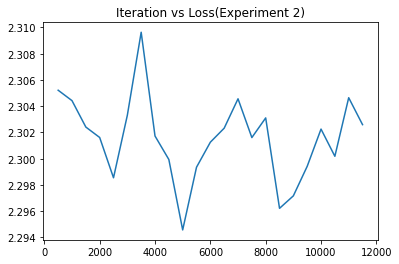

In [ ]:
plt.plot(iteration,total_loss)
plt.title('Iteration vs Loss(Experiment 2)')
plt.show()

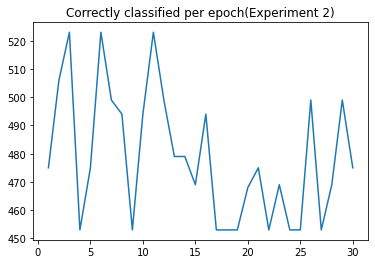

In [ ]:
plt.plot(num_of_epoch,correctly_classified_PerEpoch)
plt.title('Correctly classified per epoch(Experiment 2)')
plt.show()

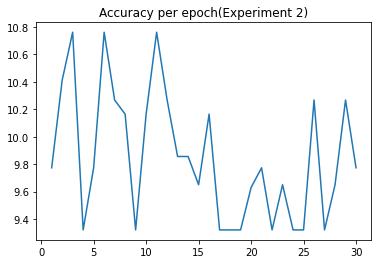

In [ ]:
plt.plot(num_of_epoch,accuracy_perEpoch)
plt.title('Accuracy per epoch(Experiment 2)')
plt.show()